# Inspect TF Records

In [1]:
import os
import sys
print(sys.executable, sys.version)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import cv2
import json
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

from glob import glob
from os.path import join, abspath
from IPython.display import display, HTML

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# for local import 
sys.path.append(abspath('..'))

from main.config import Config
from main.smpl import Smpl
from vis_util import draw_2d_on_image, show_3d_pose

/home/mmc-user/.virtualenvs/hmr2-notebook/bin/python3 3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]


In [2]:
class TfRecordConfig(Config):
    DATA_DIR = join('/', 'data', 'ssd1', 'russales', 'tfrecords')
    # DATA_DIR = join('/', 'data', 'ssd1', 'russales', 'tfrecords_with_toes')
    LOG_DIR = join('/', 'data', 'ssd1', 'russales', 'logs_notebook')
    
# class Config is implemented as singleton, inizialize subclass first!
config = TfRecordConfig()

In [3]:
config.display()


Configurations:
BATCH_SIZE                     64
CUSTOM_REGRESSOR_IDX           {0: 'regressor_toes_right.npy', 7: 'regressor_toes_left.npy'}
CUSTOM_REGRESSOR_PATH          /home/mmc-user/workspace/hmr2.0/models/regressors
DATASETS                       ['lsp', 'lsp_ext', 'mpii', 'coco', 'mpii_3d', 'h36m']
DATA_DIR                       /data/ssd1/russales/tfrecords
DISCRIMINATOR_LEARNING_RATE    0.0001
DISCRIMINATOR_LOSS_WEIGHT      1
DISCRIMINATOR_WEIGHT_DECAY     0.0001
DS_KP2D                        {'lsp': 14, 'cocoplus': 19, 'custom': 21}
DS_KP3D                        {'lsp': 14, 'cocoplus': 14, 'custom': 16}
ENCODER_INPUT_SHAPE            (224, 224, 3)
ENCODER_ONLY                   False
EPOCHS                         55
GENERATOR_2D_LOSS_WEIGHT       60.0
GENERATOR_3D_LOSS_WEIGHT       60.0
GENERATOR_LEARNING_RATE        1e-05
GENERATOR_WEIGHT_DECAY         0.0001
INITIALIZE_CUSTOM_REGRESSOR    False
ITERATIONS                     3
JOINT_TYPE                     cocoplus
L

### parse tf records example proto

In [4]:
def parse(example_proto):
    feature_map = {
        'image_raw': tf.io.FixedLenFeature([], dtype=tf.string, default_value=''),
        'keypoints_2d': tf.io.VarLenFeature(dtype=tf.float32),
        'keypoints_3d': tf.io.VarLenFeature(dtype=tf.float32),
        'has_3d': tf.io.FixedLenFeature([], dtype=tf.int64)
    }
    features = tf.io.parse_single_example(example_proto, feature_map)

    image = tf.image.decode_image(features['image_raw'], channels=3)
    kp2d = tf.reshape(tf.sparse.to_dense(features['keypoints_2d']), (-1, 3))
    kp3d = tf.reshape(tf.sparse.to_dense(features['keypoints_3d']), (-1, 3))
    has_3d = features['has_3d']

    return image, kp2d, kp3d, has_3d

def parse_test(example_proto):
    feature_map = {
        'image_raw': tf.io.FixedLenFeature([], dtype=tf.string, default_value=''),
        'keypoints_3d': tf.io.VarLenFeature(dtype=tf.float32),
        'keypoints_2d': tf.io.VarLenFeature(dtype=tf.float32),
        'has_3d': tf.io.FixedLenFeature([], dtype=tf.int64),
        'sequence': tf.io.FixedLenFeature([], dtype=tf.string, default_value='NA')
    }
    features = tf.io.parse_single_example(example_proto, feature_map)
    image = tf.image.decode_image(features['image_raw'], channels=3)
    kp2d = tf.reshape(tf.sparse.to_dense(features['keypoints_2d']), (-1, 3))
    kp3d = tf.reshape(tf.sparse.to_dense(features['keypoints_3d']), (-1, 3))
    has_3d = features['has_3d']
    sequence = features['sequence']
    return image, kp2d, kp3d, has_3d, sequence

In [5]:
def show_image(image, kp2d, vis):
    image = draw_2d_on_image(image, kp2d, vis=vis)
    plt.imshow(image)
    plt.show()

In [6]:
config.DATASETS = ['total_cap']

### show train/val examples 

In [7]:
def read_train_tfrecords(path):
    dataset = tf.data.TFRecordDataset(path).map(parse).shuffle(500)
    for x in dataset.take(100):
        image, kp2d, kp3d, has_3d = x[0], x[1], x[2], x[3]
        kp2d = kp2d.numpy()        

        #print('has3d: ', has_3d.numpy().astype(bool))
        print('visible kps: ', np.sum(kp2d[:, 2]))
        #print('kps: ', kp2d[:, :2])
        #print('vis: ', kp2d[:, 2])
        show_image(image.numpy(), kp2d[:, :2], kp2d[:, 2])
        #print('-----------------------------')

visible kps:  14.0


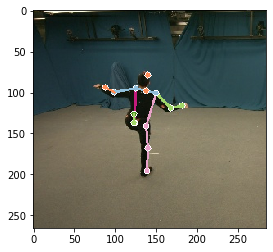

visible kps:  14.0


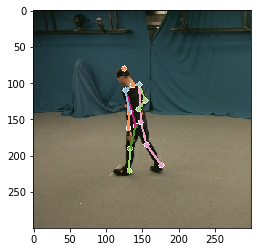

visible kps:  13.0


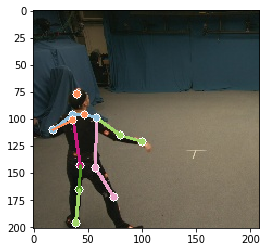

visible kps:  14.0


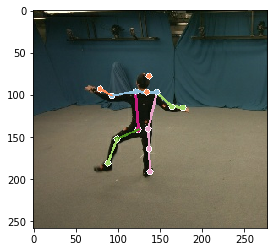

visible kps:  14.0


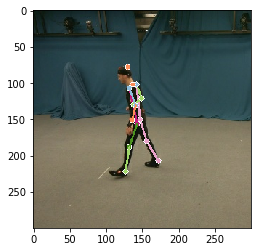

visible kps:  14.0


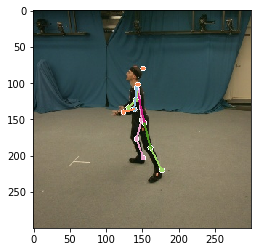

visible kps:  14.0


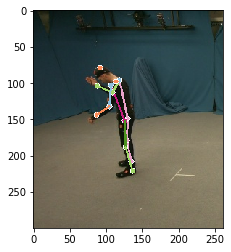

visible kps:  13.0


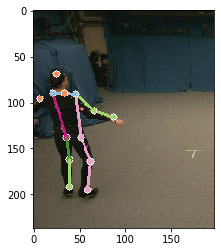

visible kps:  14.0


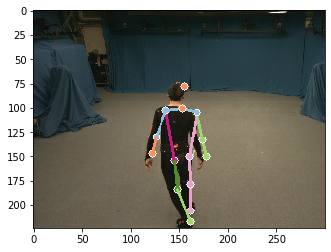

visible kps:  14.0


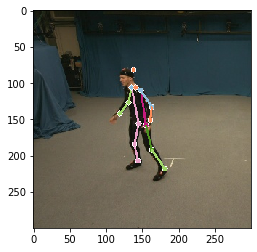

visible kps:  14.0


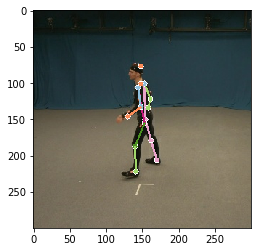

visible kps:  14.0


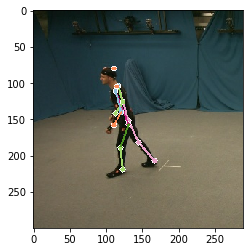

visible kps:  14.0


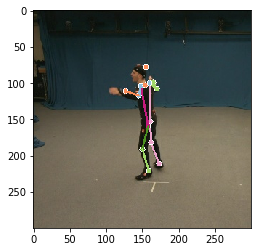

visible kps:  14.0


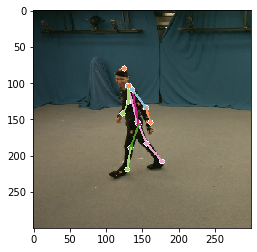

visible kps:  14.0


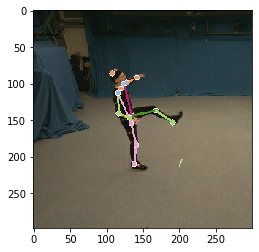

visible kps:  14.0


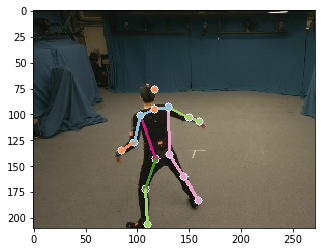

visible kps:  14.0


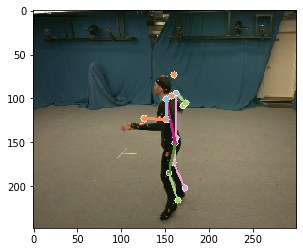

visible kps:  14.0


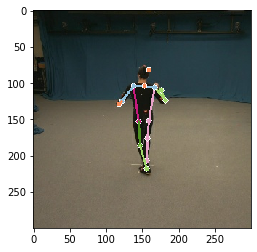

visible kps:  14.0


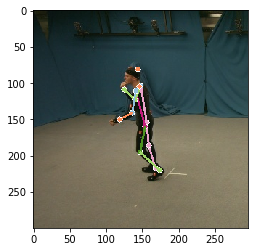

visible kps:  14.0


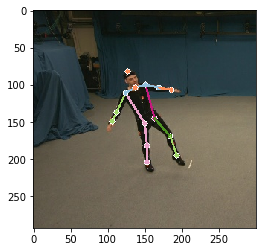

visible kps:  14.0


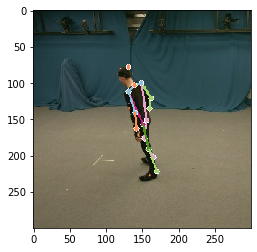

visible kps:  14.0


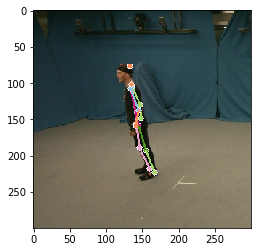

visible kps:  14.0


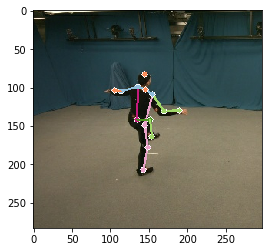

visible kps:  14.0


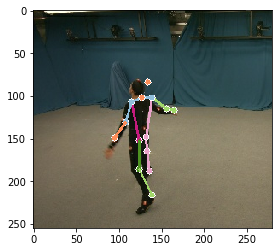

visible kps:  14.0


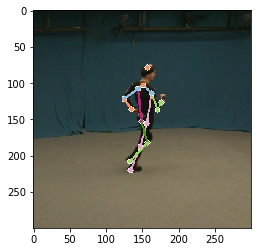

visible kps:  13.0


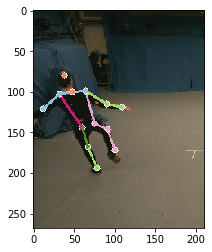

visible kps:  14.0


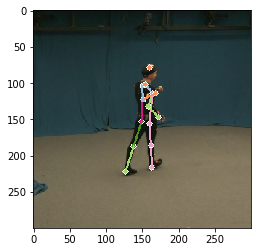

visible kps:  14.0


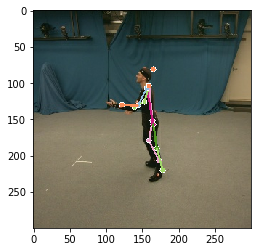

visible kps:  14.0


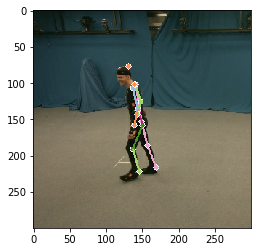

visible kps:  14.0


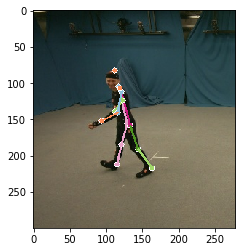

visible kps:  14.0


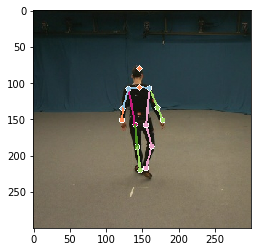

visible kps:  14.0


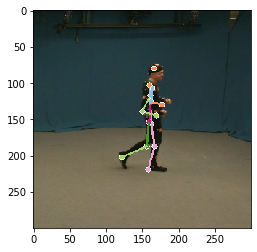

visible kps:  14.0


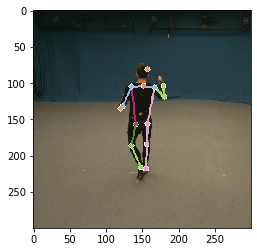

visible kps:  14.0


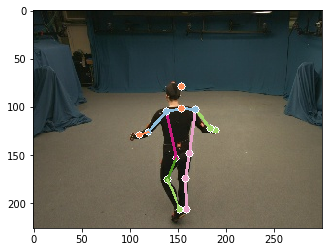

visible kps:  14.0


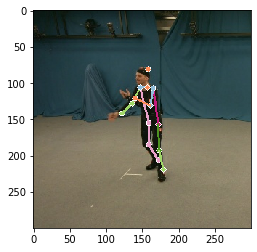

visible kps:  14.0


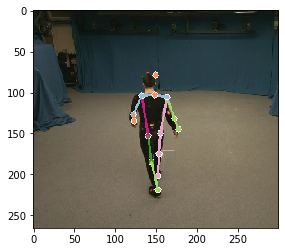

visible kps:  14.0


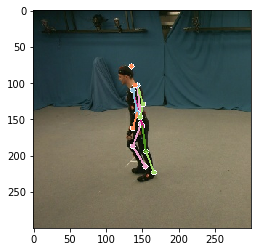

visible kps:  14.0


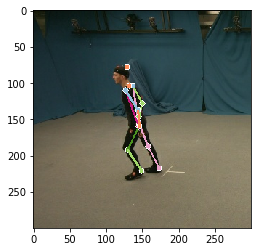

visible kps:  14.0


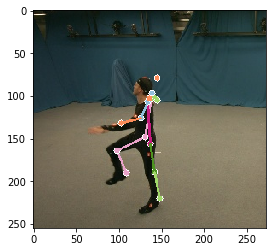

visible kps:  14.0


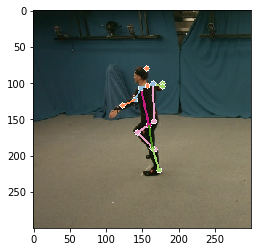

visible kps:  14.0


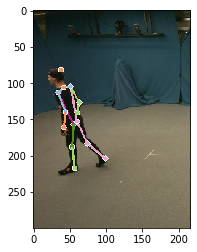

visible kps:  14.0


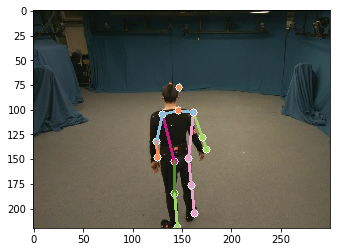

visible kps:  14.0


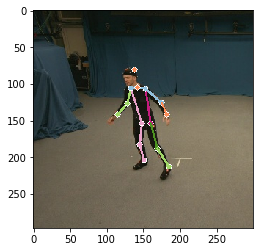

visible kps:  14.0


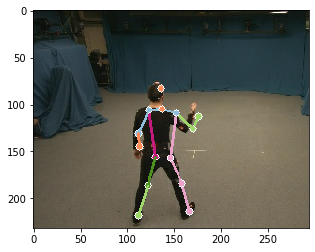

visible kps:  14.0


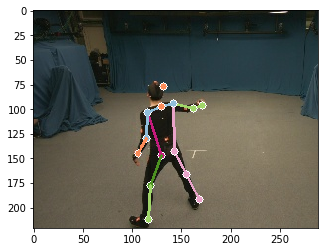

visible kps:  14.0


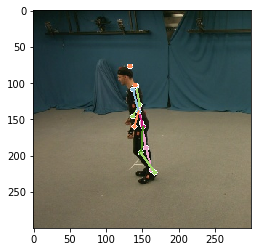

visible kps:  14.0


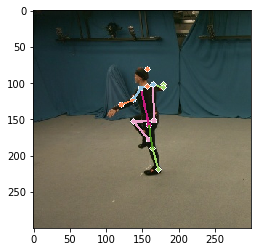

visible kps:  14.0


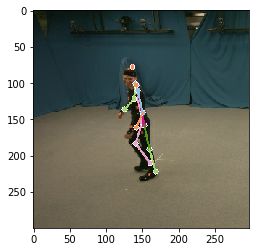

visible kps:  14.0


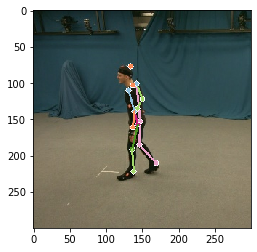

visible kps:  14.0


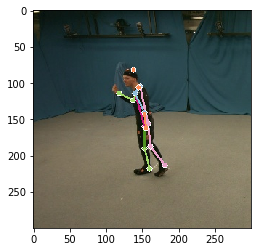

visible kps:  14.0


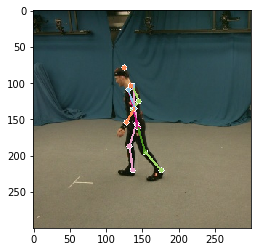

visible kps:  14.0


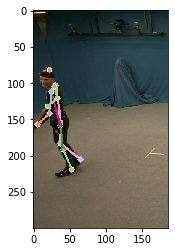

visible kps:  14.0


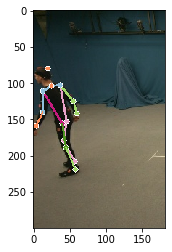

visible kps:  14.0


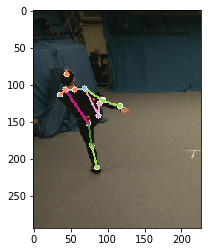

visible kps:  14.0


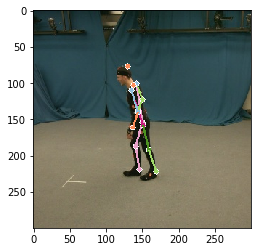

visible kps:  13.0


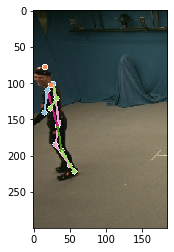

visible kps:  14.0


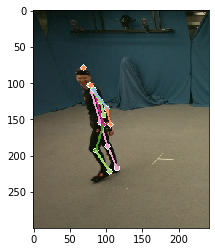

visible kps:  14.0


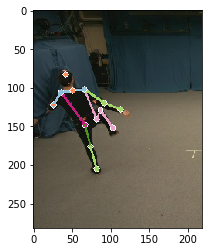

visible kps:  14.0


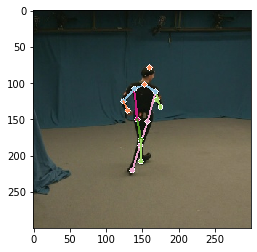

visible kps:  14.0


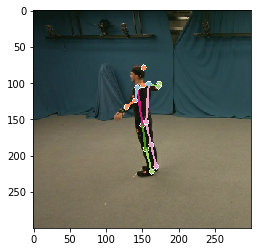

visible kps:  14.0


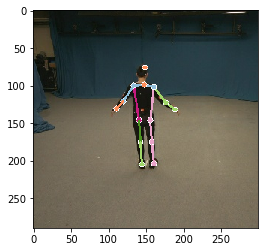

visible kps:  14.0


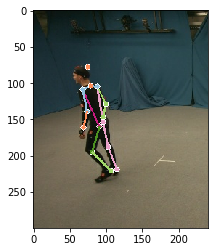

visible kps:  14.0


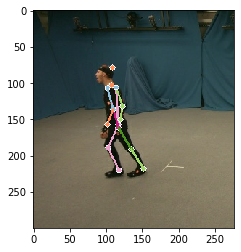

visible kps:  14.0


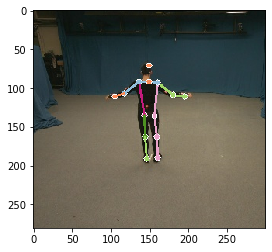

visible kps:  13.0


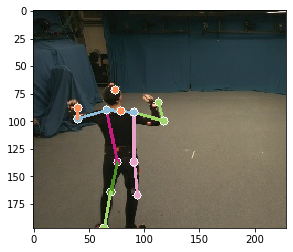

visible kps:  14.0


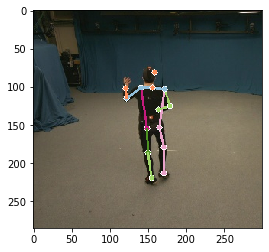

visible kps:  14.0


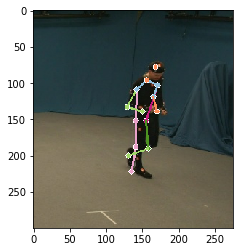

visible kps:  14.0


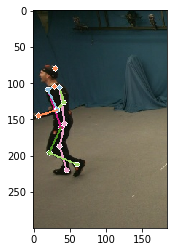

visible kps:  14.0


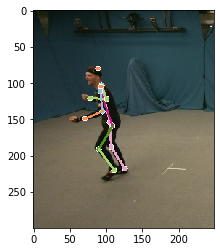

visible kps:  14.0


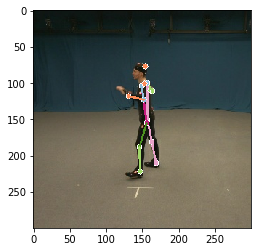

visible kps:  14.0


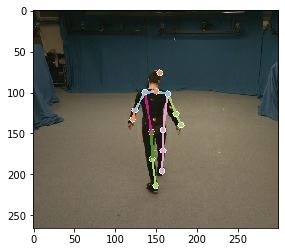

visible kps:  14.0


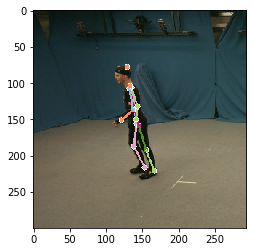

visible kps:  14.0


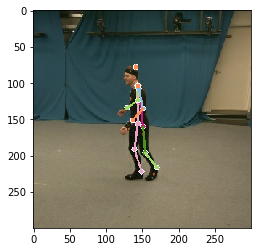

visible kps:  14.0


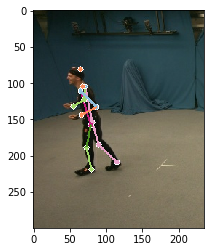

visible kps:  14.0


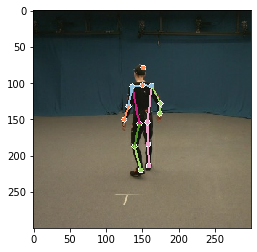

visible kps:  14.0


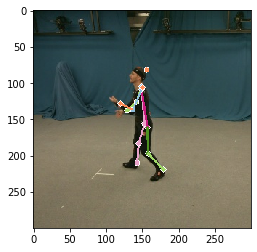

visible kps:  14.0


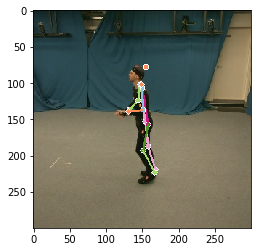

visible kps:  14.0


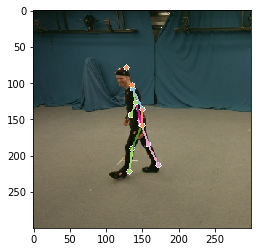

visible kps:  14.0


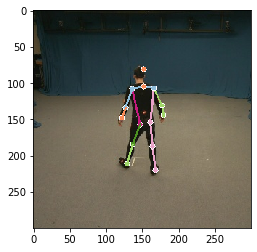

visible kps:  14.0


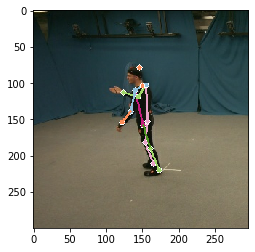

visible kps:  14.0


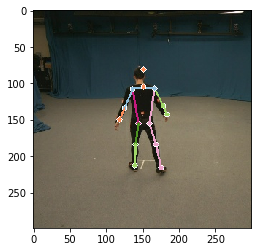

visible kps:  14.0


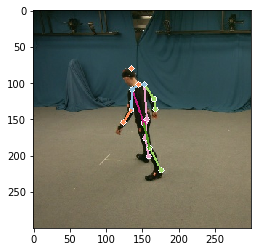

visible kps:  14.0


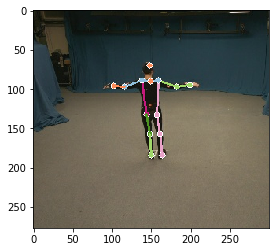

visible kps:  14.0


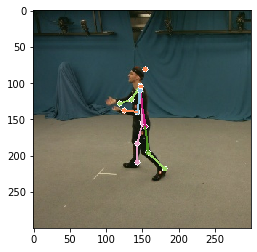

visible kps:  14.0


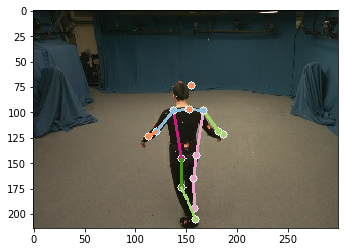

visible kps:  14.0


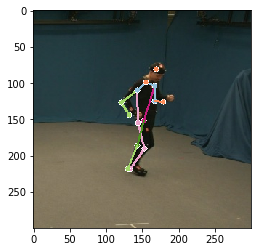

visible kps:  14.0


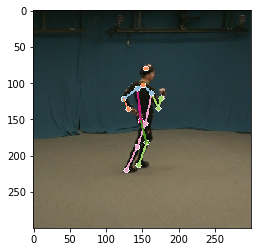

visible kps:  14.0


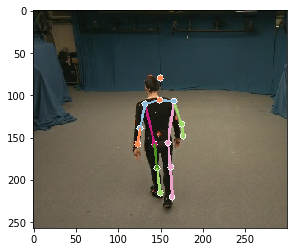

visible kps:  14.0


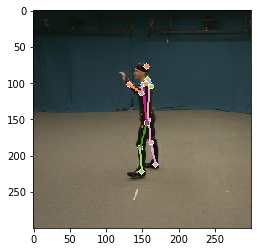

visible kps:  14.0


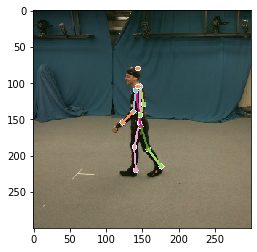

visible kps:  14.0


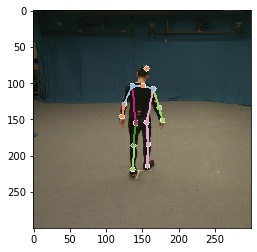

visible kps:  14.0


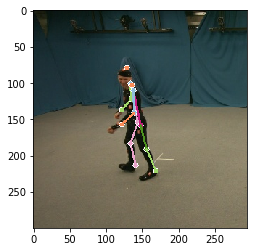

visible kps:  14.0


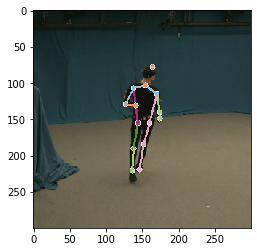

visible kps:  14.0


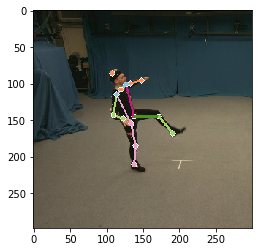

visible kps:  12.0


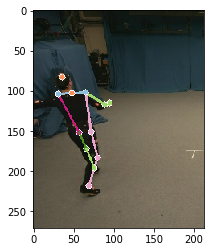

visible kps:  14.0


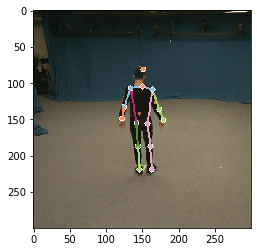

visible kps:  14.0


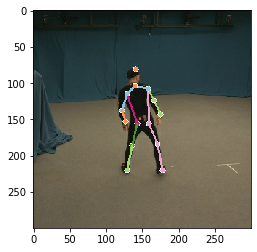

visible kps:  14.0


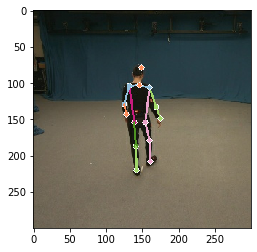

visible kps:  14.0


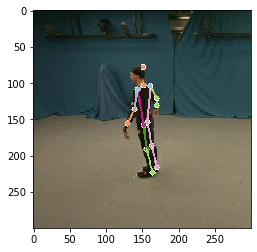

visible kps:  14.0


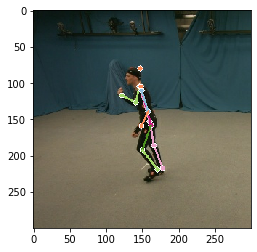

In [11]:
tf_record_dirs = [join(config.DATA_DIR, dataset, '*_train.tfrecord') for dataset in config.DATASETS]
tf_records = [tf_record for tf_records in sorted([glob(f) for f in tf_record_dirs]) for tf_record in tf_records]
random.shuffle(tf_records)

#tf_records = os.path.join("/data/ssd1/russales/new_records_test/mpii_3d/", "000_train.tfrecord")
read_train_tfrecords(tf_records)

### show test examples

In [9]:
def read_test_tfrecords(path):    
    dataset = tf.data.TFRecordDataset(path).map(parse_test).shuffle(3000)
    for image, kp2d, kp3d, has3d, sequence in dataset.take(100):
        print('sequence: ', sequence.numpy().decode('utf-8'))
        kp2d = kp2d.numpy()
        show_image(image.numpy(), kp2d[:, :2], kp2d[:, 2])    

In [9]:
tf_record_dirs = [join(config.DATA_DIR, dataset, '*_test.tfrecord') for dataset in config.DATASETS]
tf_records = [tf_record for tf_records in sorted([glob(f) for f in tf_record_dirs]) for tf_record in tf_records]
random.shuffle(tf_records)
read_test_tfrecords(tf_records)

NameError: name 'read_test_tfrecords' is not defined

In [11]:
def read_test_tfrecords_3d(path):    
    dataset = tf.data.TFRecordDataset(path).map(parse_test)
    for image, kp2d, kp3d, has3d, sequence in dataset.take(1):
        print('sequence: ', sequence.numpy().decode('utf-8'))
        kp3d = kp3d.numpy()
        kp2d = kp2d.numpy()
        show_image(image.numpy(), kp2d[:, :2], kp2d[:, 2])    
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        show_3d_pose(kp3d, ax)

sequence:  TC_S1_walking2_cam8


<IPython.core.display.Javascript object>


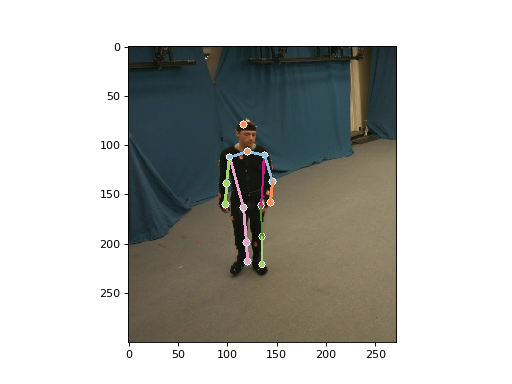

<IPython.core.display.Javascript object>


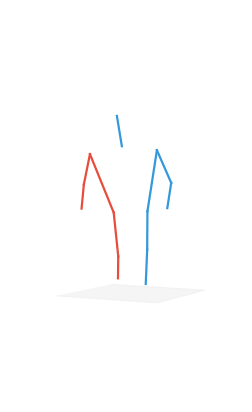

In [13]:
%matplotlib notebook
read_test_tfrecords_3d(tf_records)

## Inspect Dataset Splits (train/val/test)

Run this block to obtain frames count. Set the according numbers within config's `count_samples_of(dataset, split)` method.

In [156]:
# CountConfig
config.DATASETS = ['lsp', 'lsp_ext', 'mpii', 'coco',  'mpii_3d',  'h36m'] #'total_cap'
    
columns = ['LSP', 'LSP Extended', 'MPII Pose', 'MSCOCO',  'MPII 3D',  'Human 3.6M'] #  'Total Capture',
index = ['# samples', '# 3d samples', '# 2d samples']

In [157]:
def parse_count(example_proto):
    feature_map = {
        'has_3d': tf.io.FixedLenFeature([], dtype=tf.int64)
    }
    features = tf.io.parse_single_example(example_proto, feature_map)
    has_3d = features['has_3d']
    return has_3d

In [158]:
def count_train_val_samples(name):
    result = {}
    all_samples, all_3d_samples, all_2d_samples = 0, 0, 0
    for d, dataset in enumerate(config.DATASETS):
        tf_records = sorted(glob(join(config.DATA_DIR, dataset, '*_{}.tfrecord'.format(name))))
        if len(tf_records) == 0:
            result[dataset] = [0, 0, 0]
            print("done:", dataset)
            continue
            
        ds = tf.data.TFRecordDataset(tf_records, num_parallel_reads=config.NUM_PARALLEL) \
            .map(parse_count, num_parallel_calls=config.NUM_PARALLEL) \
            .batch(config.BATCH_SIZE, drop_remainder=False) \
            .prefetch(config.BATCH_SIZE * 2)
        
        samples, ds_3d_samples, ds_2d_samples = 0, 0, 0
        for has_3d in ds:
            has_3d = has_3d.numpy()
            count_3d = np.sum(has_3d)
            ds_3d_samples = ds_3d_samples + count_3d
            ds_2d_samples = ds_2d_samples + (has_3d.size - count_3d)
            samples = samples + has_3d.size
        
        all_samples = all_samples + samples
        all_3d_samples = all_3d_samples + ds_3d_samples
        all_2d_samples = all_2d_samples + ds_2d_samples
        
        result[columns[d]] = [samples, ds_3d_samples, ds_2d_samples]
        print("done:", dataset)
        
    print('\nTotal number of {} samples: {}'.format("train", all_samples))
    print('3d samples: {} - 2d samples: {}'.format(all_3d_samples, all_2d_samples))

    df = pd.DataFrame(result, index=index, columns=columns)

    display(HTML(df.to_html())) 
    return df 

In [159]:
df_train = count_train_val_samples('train')

done: lsp
done: lsp_ext
done: mpii
done: coco
done: mpii_3d
done: h36m

Total number of train samples: 603382
3d samples: 478261 - 2d samples: 125121


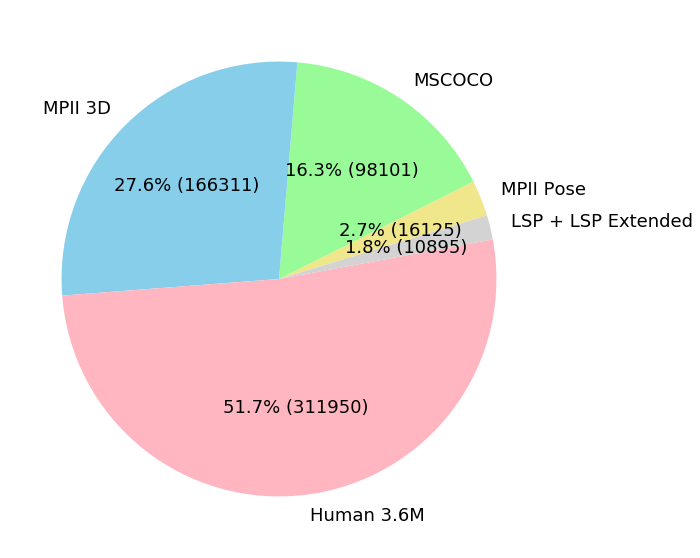

In [160]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        #pct = int(pct)
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

df_train["LSP + LSP Extended"] = sum_column
df_plot = df_train.loc[ '# samples' , 'MPII Pose': ].T

df_plot.plot.pie(y='# samples', label="", figsize=(10, 10), colors=['khaki', 'palegreen', 'skyblue', 'lightpink', 'lightgray', 'orange'], textprops=dict(color="black"), startangle=17, explode=[0, 0,  0, 0, 0] ,shadow=False, legend=False, fontsize=18, autopct=make_autopct(df_plot))

In [72]:
count_train_val_samples('val')

done: lsp
done: lsp_ext
done: mpii
done: coco
done: mpii_3d
done: h36m
done: total_cap

Total number of train samples: 20864
3d samples: 15883 - 2d samples: 4981


lsp  lsp_ext  mpii  coco  mpii_3d   h36m  total_cap
# samples     997        0     0  3984        0  15883          0
# 3d samples    0        0     0     0        0  15883          0
# 2d samples  997        0     0  3984        0      0          0

In [17]:
def count_test_samples():
    
    def parse_test(example_proto):
        feature_map = {
            'sequence': tf.io.FixedLenFeature([], dtype=tf.string)
        }
        features = tf.io.parse_single_example(example_proto, feature_map)
        sequence = features['sequence']
        return sequence
    
    num_samples, sequence_count = 0, {}
    for dataset in config.DATASETS:
        tf_records = sorted(glob(join(config.DATA_DIR, dataset, '*_test.tfrecord')))
        if len(tf_records) == 0:
            print("done:", dataset)
            continue
            
        ds = tf.data.TFRecordDataset(tf_records, num_parallel_reads=config.NUM_PARALLEL) \
            .map(parse_test, num_parallel_calls=config.NUM_PARALLEL) \
            .batch(1) \
            .prefetch(2)

        num_samples_per_ds = 0
        for sequence in ds:
            sequence = sequence.numpy()[0].decode("utf-8")
            if sequence not in sequence_count.keys():
                sequence_count[sequence] = 1
            else:
                sequence_count[sequence] += 1
            num_samples += 1
            num_samples_per_ds += 1
            
        print('done: {} - num_samples {}'.format(dataset, num_samples_per_ds))

    print('Total number of samples in tf records: ', num_samples)

    return json.dumps(sequence_count, indent=4, sort_keys=True)

In [18]:
data_test = count_test_samples()

df_test = pd.read_json(data_test, orient='index')
display(HTML(df_test.to_html()))

done: lsp
done: lsp_ext
done: mpii
done: coco
done: mpii_3d
done: h36m - num_samples 110128
done: total_cap - num_samples 74273
Total number of samples in tf records:  184401


### inspect visible keypoints 2d

In [19]:
def count_train_kp2d_samples():
    def parse_kp2d(example_proto):
        feature_map = {
            'keypoints_2d': tf.io.FixedLenFeature((config.NUM_KP2D, 3), dtype=tf.float32),
        }
        features = tf.io.parse_single_example(example_proto, feature_map)
        kp2d = features['keypoints_2d']
        return kp2d

    result = {}
    for dataset in config.DATASETS:
        tf_records = sorted([glob(join(config.DATA_DIR, dataset, '*_train.tfrecord'))])
        if len(tf_records) == 0:
            print("done:", dataset)
            result[dataset] = np.zeros(19)
            continue

        ds = tf.data.TFRecordDataset(tf_records, num_parallel_reads=config.NUM_PARALLEL) \
            .map(parse_kp2d, num_parallel_calls=config.NUM_PARALLEL) \
            .batch(config.BATCH_SIZE) \
            .prefetch(config.BATCH_SIZE * 2)

        idx = range(19)
        vis_kps = np.ndarray((19,))
        for kp2d in ds:
            kp2d = kp2d.numpy()
            kps = np.transpose(kp2d, (1, 0, 2))
            for i, kp in zip(idx, kps):
                np_sum = np.sum(kp[:, 2])
                if np_sum > config.BATCH_SIZE:
                    print('error')
                vis_kps[i] = vis_kps[i] + np_sum

        print("done:", dataset)
        result[dataset] = vis_kps

    return result

In [20]:
columns_kp2d = ['lsp', 'lsp_ext', 'mpii', 'coco', 'mpii_3d', 'h36m', 'total_cap']
coco_kp2d = ['ankle_r', 'knee_r', 'hip_r', 'hip_l', 'knee_l', 'ankle_l', 'wrist_r', 'elbow_r', 'shoulder_r', 
            'shoulder_l', 'elbow_l', 'wrist_l', 'neck', 'brain', 'nose', 'eye_l', 'eye_r', 'ear_l', 'ear_r']

data_kp2d = count_train_kp2d_samples()

df_kp2d = pd.DataFrame(data_kp2d, index=coco_kp2d, columns=columns_kp2d)
df_kp2d = df_kp2d.astype('int32')
display(HTML(df_kp2d.to_html()))

# if following error occurs just run again
# Cannot convert non-finite values (NA or inf) to integer

done: lsp
done: lsp_ext
done: mpii
done: coco
done: mpii_3d
done: h36m
done: total_cap


In [21]:
df_kp2d.to_csv('dataset_kps.csv')

### inspect angles between joints 

In [22]:
def parse_keypoints(example_proto):
    feature_map = {
        'keypoints_2d': tf.io.FixedLenFeature((config.NUM_KP2D, 3), dtype=tf.float32),
        'keypoints_3d': tf.io.FixedLenFeature((config.NUM_KP3D, 3), dtype=tf.float32),
    }
    features = tf.io.parse_single_example(example_proto, feature_map)
    kp2d = features['keypoints_2d']
    kp3d = features['keypoints_3d']
    return kp2d, kp3d

def calc_angle(a, b, c):
    a = np.squeeze(a)
    b = np.squeeze(b)
    c = np.squeeze(c)
    ba = a - b
    bc = c - b

    dot = np.dot(ba, bc)
    cosine_angle =  dot / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    degree = np.degrees(angle)
    return degree

In [23]:
angles_indices = {
    'angles_2d_r': [0, 1, 2],
    'angles_2d_l': [7, 6, 5],
    'angles_3d_r': [0, 1, 2],
    'angles_3d_l': [7, 6, 5]
}
angle_datasets = ['mpii_3d', 'h36m', 'total_cap']
def check_angles(angle_type):

    result = {}
    for dataset in angle_datasets:
        tf_records = sorted([glob(join(config.DATA_DIR, dataset, '*_train.tfrecord'))])
        if len(tf_records) == 0:
            print("done:", dataset)
            result[dataset] = []
            continue

        ds = tf.data.TFRecordDataset(tf_records, num_parallel_reads=config.NUM_PARALLEL) \
            .map(parse_keypoints, num_parallel_calls=config.NUM_PARALLEL) \
            .batch(1, drop_remainder=True) \
            .prefetch(config.BATCH_SIZE * 2)

        
        angles = angles_indices[angle_type]
        
        data = []
        for kp2d, kp3d in ds:
            kp2d = kp2d.numpy()
            if np.sum(kp2d[:, angles, 2]) != 3:
                continue
                
            kp = kp2d[:,:,:2] if '2d' in angle_type else kp3d.numpy()
            data.append(calc_angle(kp[:, angles[0]], kp[:, angles[1]], kp[:, angles[2]]))
        
        big_angles = np.where(data > np.percentile(data, 90))
        print(big_angles)
        small_angles = np.where(data < np.percentile(data, 10))
        print(small_angles)
        print("done:", dataset)
        
        data = np.nan_to_num(data)
        mean = np.mean(data)
        median = np.median(data)
        std = np.std(data)  
        min_ = data.min() 
        max_ = data.max()
        perc_25 = np.percentile(data, 25)  
        perc_50 = np.percentile(data, 50)  
        perc_75 = np.percentile(data, 75) 
        
        result[dataset] = [mean, median, std, min_, max_, perc_25, perc_50, perc_75]

    return result

In [24]:
data_angles = []
for angle in angles_indices.keys():
    print('start checking ', angle)
    data_angles.append(check_angles(angle))

start checking  angles_2d_r


/home/mmc-user/.virtualenvs/hmr2-notebook/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in arccos
/home/mmc-user/.virtualenvs/hmr2-notebook/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less
/home/mmc-user/.virtualenvs/hmr2-notebook/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater


(array([], dtype=int64),)
(array([], dtype=int64),)
done: mpii_3d
(array([], dtype=int64),)
(array([], dtype=int64),)
done: h36m
(array([], dtype=int64),)
(array([], dtype=int64),)
done: total_cap
start checking  angles_2d_l
(array([], dtype=int64),)
(array([], dtype=int64),)
done: mpii_3d
(array([], dtype=int64),)
(array([], dtype=int64),)
done: h36m
(array([], dtype=int64),)
(array([], dtype=int64),)
done: total_cap
start checking  angles_3d_r
(array([     1,      4,      5, ..., 167604, 167655, 167657]),)
(array([    10,     13,     24, ..., 167712, 167721, 167737]),)
done: mpii_3d
(array([     4,     20,     36, ..., 118936, 118947, 118949]),)
(array([     7,     19,     82, ..., 118663, 118728, 118759]),)
done: h36m
(array([   26,    36,    74, ..., 77666, 77667, 77668]),)
(array([   11,    37,    41, ..., 77676, 77677, 77695]),)
done: total_cap
start checking  angles_3d_l
(array([     4,      6,     20, ..., 167467, 167469, 167471]),)
(array([     1,      3,      5, ..., 167558, 

In [25]:
columns_angles = ['mpii_3d', 'h36m', 'total_cap']
index = ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max', '25%', '50%', '75%']

frames = []
for data in data_angles:
    frames.append(pd.DataFrame(data, index=index, columns=columns_angles)) 

df_angles = pd.concat(frames, axis=1, sort=False, keys=list(angles_indices.keys()))
display(HTML(df_angles.to_html()))

In [26]:
df_angles.to_csv('angles_distribution.csv')

### inspect smpl/mosh data

In [27]:
def parse_smpl(example_proto):
    feature_map = {
        'pose': tf.io.VarLenFeature(dtype=tf.float32),
        'shape': tf.io.VarLenFeature(dtype=tf.float32),
    }
    features = tf.io.parse_single_example(example_proto, feature_map)
    pose = tf.reshape(tf.sparse.to_dense(features['pose']), (config.NUM_POSE_PARAMS,))
    shape = tf.reshape(tf.sparse.to_dense(features['shape']), (config.NUM_SHAPE_PARAMS,))

    return tf.concat([tf.zeros(3), pose, shape], axis=-1)  # fake cam, pose and shape

In [28]:
def count_train_smpl_samples():
    result = {}
    for dataset in config.SMPL_DATASETS:
        tf_records = sorted([glob(join(config.SMPL_DATA_DIR, dataset, '*_train.tfrecord'))])
        
        ds = tf.data.TFRecordDataset(tf_records, num_parallel_reads=config.NUM_PARALLEL) \
            .map(parse_smpl, num_parallel_calls=config.NUM_PARALLEL) \
            .batch(config.BATCH_SIZE) \
            .prefetch(config.BATCH_SIZE * 2)

        num_smpl = 0
        for smpl in ds:
            num_smpl += smpl.numpy().shape[0]
            
        print("done:", dataset)
        result[dataset] = num_smpl
        
    return result

In [29]:
columns_smpl = ['cmu', 'joint_lim']
index_smpl = ['# samples']

data_smpl = count_train_smpl_samples()

df_smpl = pd.DataFrame(data_smpl, index=index_smpl, columns=columns_smpl)
df_smpl = df_smpl.astype('int32')
display(HTML(df_smpl.to_html()))

done: cmu
done: joint_lim


### serialize example proto

In [30]:
def print_example(path):
    raw_dataset = tf.data.TFRecordDataset([path])

    for raw_record in raw_dataset.take(1):
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        print(example)

In [31]:
path = os.path.join("/data/ssd1/russales/tfrecords_with_toes/total_cap", "305_test.tfrecord")
print_example(path)

features {
  feature {
    key: "has_3d"
    value {
      int64_list {
        value: 1
      }
    }
  }
  feature {
    key: "image_raw"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\002\001\001\001\001\001\002\001\001\001\002\002\002\002\002\004\003\002\002\002\002\005\004\004\003\004\006\005\006\006\006\005\006\006\006\007\t\010\006\007\t\007\006\006\010\013\010\t\n\n\n\n\n\006\010\013\014\013\n\014\t\n\n\n\377\333\000C\001\002\002\002\002\002\002\005\003\003\005\n\007\006\007\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\377\300\000\021\010\001,\000\334\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\0